# Goals

- Find the changes in diabetes year by year
- which city have the most penderita
- find the changes year by year
- find the healtry ones
- see the changes



In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [333]:
df = pd.read_csv(r"C:\Users\wilsen\OneDrive\Desktop\important projects\Diabetes\dinkes-od_17448_jml_penderita_diabetes_melitus__kabupatenkota_v3_data.csv")

In [334]:
df

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_penderita_dm,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,57769,ORANG,2019
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,148447,ORANG,2019
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,12100,ORANG,2019
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,45412,ORANG,2019
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,0,ORANG,2019
...,...,...,...,...,...,...,...,...
157,158,32,JAWA BARAT,3279,KOTA BANJAR,46481,ORANG,2024
158,159,32,JAWA BARAT,3279,KOTA BANJAR,44061,ORANG,2024
159,160,32,JAWA BARAT,3279,KOTA BANJAR,10021,ORANG,2024
160,161,32,JAWA BARAT,3279,KOTA BANJAR,11782,ORANG,2024


In [335]:
df.drop(["id","kode_provinsi","satuan"], axis= 1 , inplace= True)


In [336]:
df.duplicated().sum()

np.int64(0)

In [337]:
df.isnull().sum()

nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
jumlah_penderita_dm    0
tahun                  0
dtype: int64

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nama_provinsi        162 non-null    object
 1   kode_kabupaten_kota  162 non-null    int64 
 2   nama_kabupaten_kota  162 non-null    object
 3   jumlah_penderita_dm  162 non-null    int64 
 4   tahun                162 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.5+ KB


In [339]:
df.describe()

,kode_kabupaten_kota,jumlah_penderita_dm,tahun
count,162.000000,162.000000,162.000000
mean,3239.277778,29699.388889,2021.500000
std,33.672934,31787.221502,1.713121
min,3201.000000,0.000000,2019.000000
25%,3209.000000,12306.000000,2020.000000
50%,3217.000000,19279.000000,2021.500000
75%,3277.000000,39988.750000,2023.000000
max,3279.000000,242169.000000,2024.000000


In [340]:
df = df[df["tahun"] < 2024] 

In [341]:
df

,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_penderita_dm,tahun
0,JAWA BARAT,3201,KABUPATEN BOGOR,57769,2019
1,JAWA BARAT,3202,KABUPATEN SUKABUMI,148447,2019
2,JAWA BARAT,3203,KABUPATEN CIANJUR,12100,2019
3,JAWA BARAT,3204,KABUPATEN BANDUNG,45412,2019
4,JAWA BARAT,3205,KABUPATEN GARUT,0,2019
...,...,...,...,...,...
130,JAWA BARAT,3275,KOTA BEKASI,43257,2023
131,JAWA BARAT,3276,KOTA DEPOK,43929,2023
132,JAWA BARAT,3277,KOTA CIMAHI,10016,2023
133,JAWA BARAT,3278,KOTA TASIKMALAYA,11782,2023


In [342]:
df

,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_penderita_dm,tahun
0,JAWA BARAT,3201,KABUPATEN BOGOR,57769,2019
1,JAWA BARAT,3202,KABUPATEN SUKABUMI,148447,2019
2,JAWA BARAT,3203,KABUPATEN CIANJUR,12100,2019
3,JAWA BARAT,3204,KABUPATEN BANDUNG,45412,2019
4,JAWA BARAT,3205,KABUPATEN GARUT,0,2019
...,...,...,...,...,...
130,JAWA BARAT,3275,KOTA BEKASI,43257,2023
131,JAWA BARAT,3276,KOTA DEPOK,43929,2023
132,JAWA BARAT,3277,KOTA CIMAHI,10016,2023
133,JAWA BARAT,3278,KOTA TASIKMALAYA,11782,2023


In [343]:
jumalah_penderita_pertahun = df.groupby("tahun", as_index=False)["jumlah_penderita_dm"].sum()

In [344]:
jumalah_penderita_pertahun

,tahun,jumlah_penderita_dm
0,2019,848455
1,2020,1078857
2,2021,925675
3,2022,644704
4,2023,645390


In [345]:
jumalah_penderita_pertahun["tahun"]

0    2019
1    2020
2    2021
3    2022
4    2023
Name: tahun, dtype: int64

In [346]:
jumalah_penderita_pertahun["jumlah_penderita_dm"]

0     848455
1    1078857
2     925675
3     644704
4     645390
Name: jumlah_penderita_dm, dtype: int64

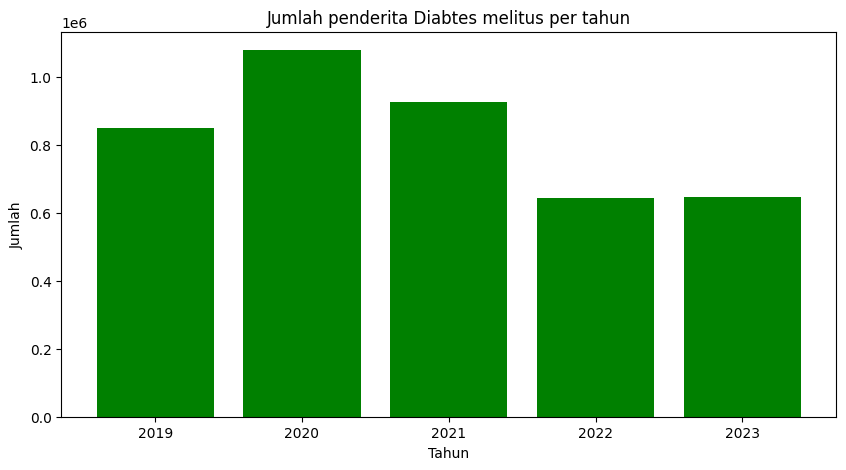

In [347]:
plt.figure(figsize=(10,5))
plt.bar(jumalah_penderita_pertahun["tahun"],jumalah_penderita_pertahun["jumlah_penderita_dm"].values, color = "green")
plt.title("Jumlah penderita Diabtes melitus per tahun")

plt.ylabel("Jumlah")
plt.xlabel("Tahun")

plt.show()

<Axes: xlabel='tahun', ylabel='jumlah_penderita_dm'>

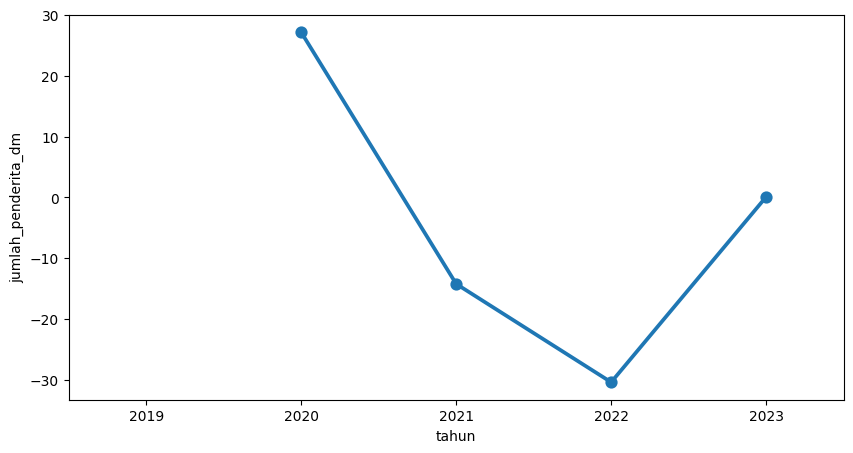

In [348]:
plt.figure(figsize=(10,5))

sns.pointplot(x= jumalah_penderita_pertahun["tahun"], y = jumalah_penderita_pertahun["jumlah_penderita_dm"].pct_change()*100 )

In [349]:
jumalah_penderita_pertahun["jumlah_penderita_dm"].pct_change()*100

0          NaN
1    27.155477
2   -14.198545
3   -30.353094
4     0.106405
Name: jumlah_penderita_dm, dtype: float64

In [350]:
df.columns

Index(['nama_provinsi', 'kode_kabupaten_kota', 'nama_kabupaten_kota',
       'jumlah_penderita_dm', 'tahun'],
      dtype='object')

In [351]:
kota_diabet = df.groupby(["nama_kabupaten_kota"],as_index=False)["jumlah_penderita_dm"].sum()

In [352]:
kota_diabet

,nama_kabupaten_kota,jumlah_penderita_dm
0,KABUPATEN BANDUNG,265716
1,KABUPATEN BANDUNG BARAT,69567
2,KABUPATEN BEKASI,448380
3,KABUPATEN BOGOR,319968
4,KABUPATEN CIAMIS,214918
5,KABUPATEN CIANJUR,70341
6,KABUPATEN CIREBON,104020
7,KABUPATEN GARUT,100391
8,KABUPATEN INDRAMAYU,131444
9,KABUPATEN KARAWANG,515661


# Total

In [353]:
kota_diabet.sort_values(by="jumlah_penderita_dm", ascending= False).head(5)

,nama_kabupaten_kota,jumlah_penderita_dm
9,KABUPATEN KARAWANG,515661
2,KABUPATEN BEKASI,448380
3,KABUPATEN BOGOR,319968
0,KABUPATEN BANDUNG,265716
15,KABUPATEN SUKABUMI,255654


In [354]:
kota_diabet_tahun = df.groupby(["nama_kabupaten_kota","tahun"],as_index=False)["jumlah_penderita_dm"].sum()

In [355]:
kota_diabet_tahun["tahun"].unique()

array([2019, 2020, 2021, 2022, 2023])

In [356]:
def year_finder(year):  
    return kota_diabet_tahun[kota_diabet_tahun["tahun"] == year].sort_values(by="jumlah_penderita_dm",ascending=False).head(5)

In [357]:
year_finder(2019)

,nama_kabupaten_kota,tahun,jumlah_penderita_dm
45,KABUPATEN KARAWANG,2019,149537
75,KABUPATEN SUKABUMI,2019,148447
10,KABUPATEN BEKASI,2019,89055
20,KABUPATEN CIAMIS,2019,69113
15,KABUPATEN BOGOR,2019,57769


In [358]:


def auto_year_bar(x):
    plt.bar(x["nama_kabupaten_kota"],x["jumlah_penderita_dm"])
    plt.xticks(rotation = 90)

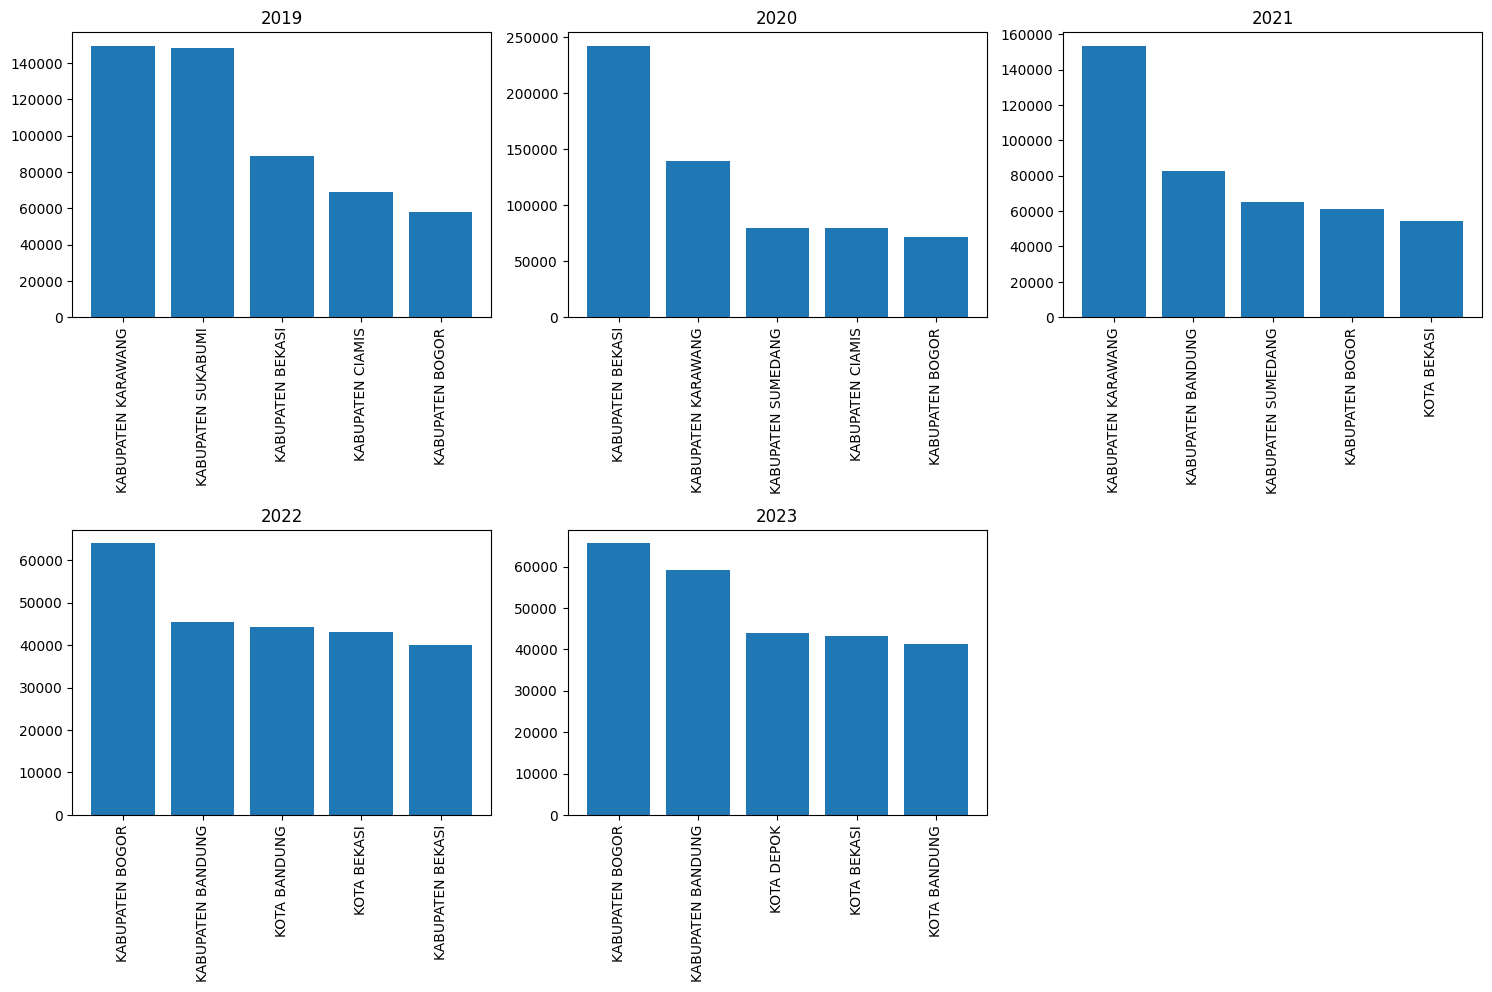

In [359]:
years = [2019, 2020, 2021, 2022, 2023]
plt.figure(figsize=(15,10))
for i,y in enumerate(years,1):
    
    plt.subplot(2,3,i)
    plt.bar(year_finder(y)["nama_kabupaten_kota"],year_finder(y)["jumlah_penderita_dm"])
    plt.title(y)
    plt.tight_layout(pad=1.0)
    plt.xticks(rotation = 90)
    


In [360]:
def year_finder2(year):  
    return kota_diabet_tahun[kota_diabet_tahun["tahun"] == year].sort_values(by="jumlah_penderita_dm").head(5)

In [361]:
kota_diabet_tahun[kota_diabet_tahun["tahun"] == 2019].sort_values(by="jumlah_penderita_dm")

,nama_kabupaten_kota,tahun,jumlah_penderita_dm
5,KABUPATEN BANDUNG BARAT,2019,0
35,KABUPATEN GARUT,2019,0
60,KABUPATEN PANGANDARAN,2019,0
80,KABUPATEN SUMEDANG,2019,0
125,KOTA SUKABUMI,2019,0
130,KOTA TASIKMALAYA,2019,0
115,KOTA CIREBON,2019,0
95,KOTA BANJAR,2019,1946
40,KABUPATEN INDRAMAYU,2019,5504
110,KOTA CIMAHI,2019,9571


In [362]:
kota_diabet_tahun.replace(0, np.nan, inplace=True)

In [363]:
kota_diabet_tahun.dropna(inplace=True)

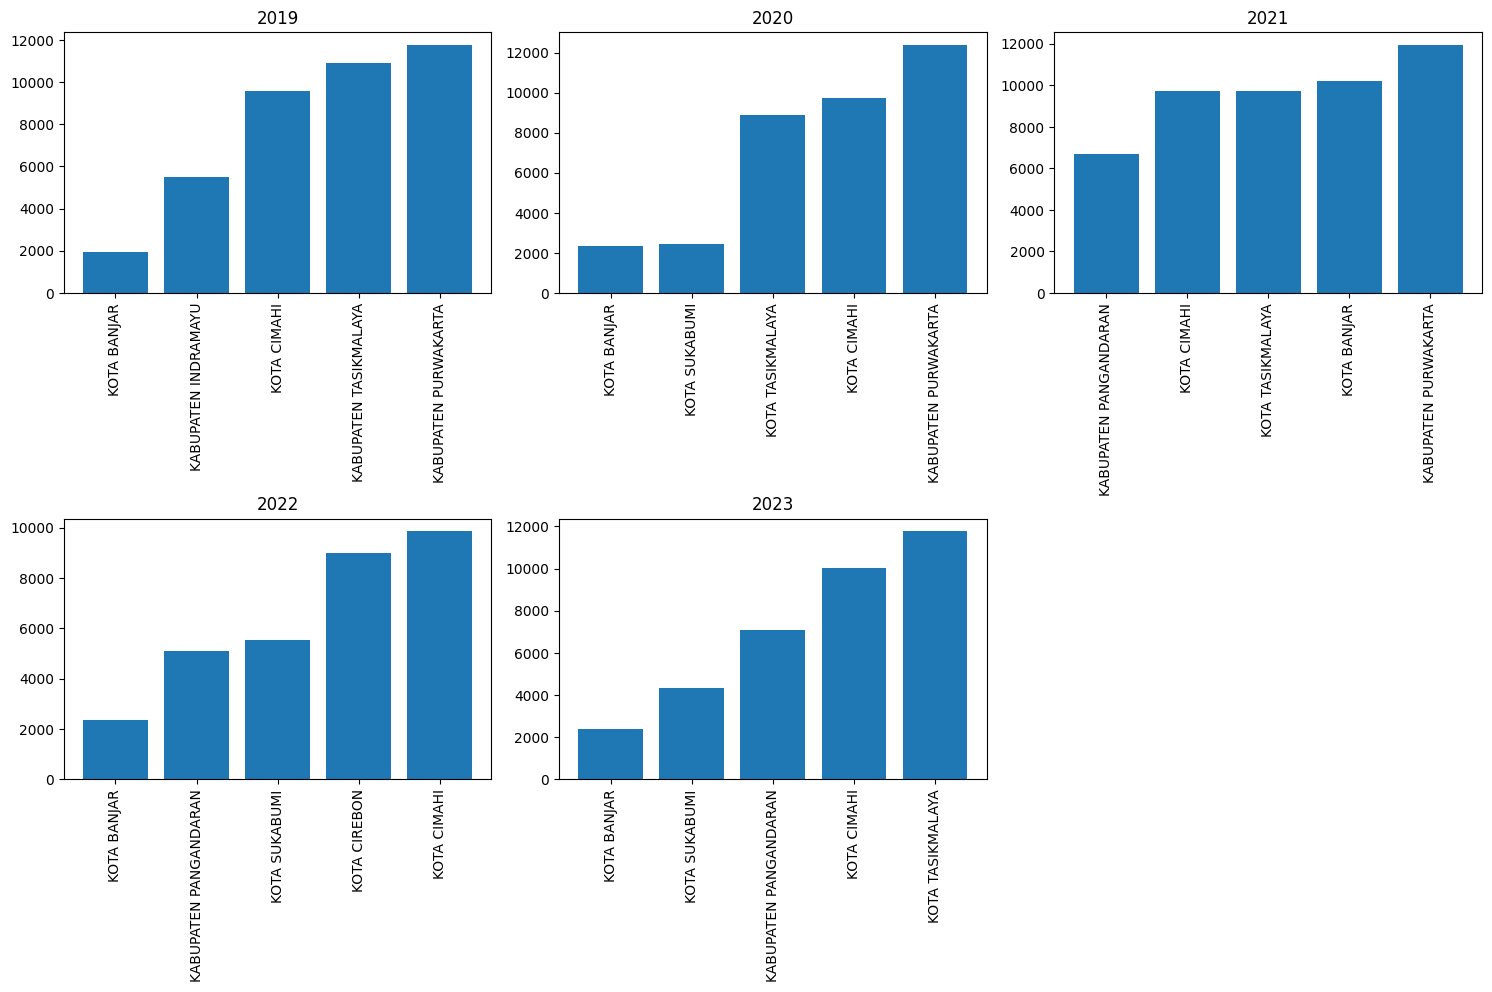

In [364]:
plt.figure(figsize=(15,10))
for i,y in enumerate(years,1):
    
    plt.subplot(2,3,i)
    plt.bar(year_finder2(y)["nama_kabupaten_kota"],year_finder2(y)["jumlah_penderita_dm"])
    plt.title(y)
    plt.tight_layout(pad=1.0)
    plt.xticks(rotation = 90)

In [365]:
year_finder2(2019)

,nama_kabupaten_kota,tahun,jumlah_penderita_dm
95,KOTA BANJAR,2019,1946.0
40,KABUPATEN INDRAMAYU,2019,5504.0
110,KOTA CIMAHI,2019,9571.0
85,KABUPATEN TASIKMALAYA,2019,10930.0
65,KABUPATEN PURWAKARTA,2019,11783.0
